In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

sns.set()

def RMSE(actual, predicted):
    return np.sqrt(mean_squared_error(actual,predicted))

In [51]:
df = pd.read_csv('df.csv')

/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Proportion of Revenue from US')

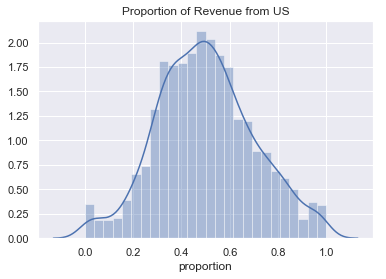

In [52]:
sns.distplot(df['proportion'])
plt.title('Proportion of Revenue from US')

In [53]:
features = df.loc[:,['budget', 'cum_ww_gross', 'ratings_count', 'runtime',
       'user_rating', 'year', 'Australia', 'Canada', 'China',
       'France', 'Germany', 'Hong Kong', 'Japan', 'Spain', 'UK', 'USA',
       'other_country', 'G', 'NC-17', 'Not Rated', 'PG', 'PG-13', 'R',
       'Antoine Fuqua', 'Brett Ratner', 'Chris Columbus', 'Clint Eastwood',
       'David Fincher', 'Gore Verbinski', 'Ivan Reitman', 'Joel Schumacher',
       'M. Night Shyamalan', 'Michael Bay', 'Paul W.S. Anderson',
       'Ridley Scott', 'Robert Zemeckis', 'Roland Emmerich', 'Ron Howard',
       'Steven Soderbergh', 'Steven Spielberg', 'Tim Burton', 'Tony Scott',
       'other_director', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']]

In [54]:
target = df.loc[:,'proportion']

In [55]:
X_train1, X_test, y_train1, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train1)
X_test_scaled = scaler.transform(X_test)

X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_train1, test_size=0.25, random_state=42)

m = LinearRegression()
m.fit(X_train,y_train)
m.score(X_train,y_train)

0.26632689072825744

In [56]:
poly2 = PolynomialFeatures(2)

lm_poly2 = LinearRegression()
lm_poly2.fit(poly2.fit_transform(X_train), y_train)
lm_poly2.score(poly2.fit_transform(X_train), y_train)

0.6341543009394803

/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


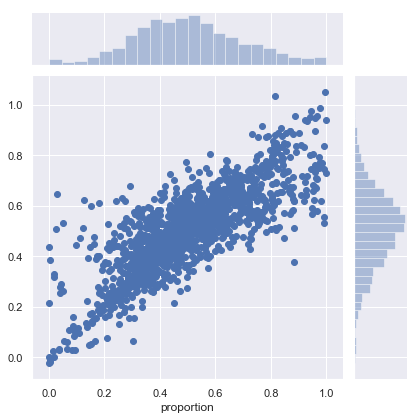

In [57]:
y_pred = lm_poly2.predict(poly2.transform(X_train))
sns.jointplot(y_train, y_pred)

In [58]:
RMSE(lm_poly2.predict(poly2.fit_transform(X_train)),y_train)

0.11962380825635513

In [59]:
lm_poly2.score(poly2.fit_transform(X_val), y_val)

-1.2056128892974747e+25

(array([  1.,   6.,  15.,  80., 286., 701., 257.,  87.,  22.,   3.]),
 array([-0.61651007, -0.50432044, -0.39213082, -0.27994119, -0.16775156,
        -0.05556194,  0.05662769,  0.16881731,  0.28100694,  0.39319657,
         0.50538619]),
 <a list of 10 Patch objects>)

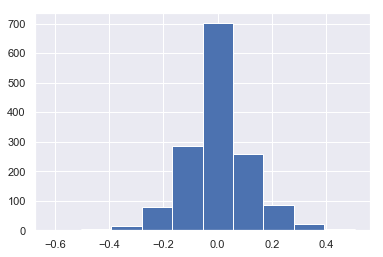

In [60]:
resp2 = y_train-lm_poly2.predict(poly2.fit_transform(X_train))
plt.hist(resp2)

(array([  1.,   0.,   3.,   4., 447.,  22.,   4.,   1.,   0.,   5.]),
 array([-5.39344726e+12, -4.27648875e+12, -3.15953024e+12, -2.04257174e+12,
        -9.25613228e+11,  1.91345281e+11,  1.30830379e+12,  2.42526230e+12,
         3.54222081e+12,  4.65917932e+12,  5.77613782e+12]),
 <a list of 10 Patch objects>)

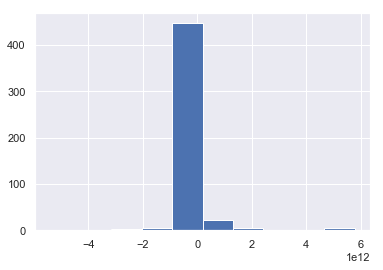

In [61]:
resp2 = y_val - lm_poly2.predict(poly2.fit_transform(X_val))
plt.hist(resp2)

In [36]:
poly3 = PolynomialFeatures(3)

lm_poly3 = LinearRegression()
lm_poly3.fit(poly3.fit_transform(X_train), y_train)
lm_poly3.score(poly3.fit_transform(X_train), y_train)

1.0

/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


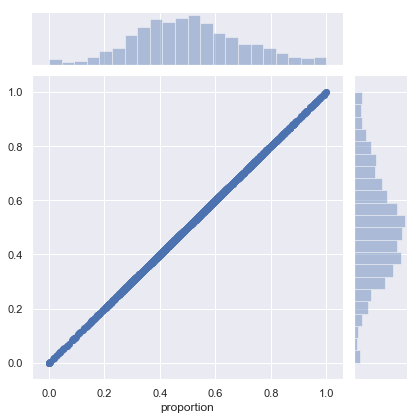

In [37]:
y_pred = lm_poly3.predict(poly3.transform(X_train))
sns.jointplot(y_train, y_pred)

In [38]:
RMSE(lm_poly3.predict(poly3.fit_transform(X_train)),y_train)

4.180259146468322e-13

In [39]:
lm_poly3.score(poly3.fit_transform(X_val), y_val)

-615.2397585453413

(array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 5.000e+00, 1.000e+00,
        5.000e+00, 1.381e+03, 6.100e+01, 3.000e+00]),
 array([-9.34274880e-12, -8.15090773e-12, -6.95906666e-12, -5.76722559e-12,
        -4.57538452e-12, -3.38354345e-12, -2.19170238e-12, -9.99861305e-13,
         1.91979765e-13,  1.38382084e-12,  2.57566191e-12]),
 <a list of 10 Patch objects>)

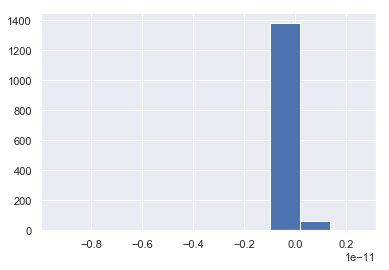

In [62]:
resp3 = y_train-lm_poly3.predict(poly3.fit_transform(X_train))
plt.hist(resp3)

(array([  4.,  19., 148., 275.,  26.,   9.,   4.,   0.,   0.,   2.]),
 array([-18.03241198, -12.19656239,  -6.36071279,  -0.52486319,
          5.31098641,  11.14683601,  16.98268561,  22.8185352 ,
         28.6543848 ,  34.4902344 ,  40.326084  ]),
 <a list of 10 Patch objects>)

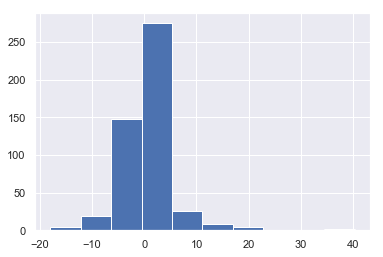

In [63]:
resp3 = y_val - lm_poly3.predict(poly3.fit_transform(X_val))
plt.hist(resp3)

In [40]:
r = RidgeCV()
r.fit(poly3.fit_transform(X_train),y_train)
r.score(poly3.fit_transform(X_train),y_train)

0.9187911529154917

In [41]:
r.score(poly3.fit_transform(X_val), y_val)

-3.918942723570076

(array([6.000e+00, 1.000e+01, 4.600e+01, 2.330e+02, 1.062e+03, 8.100e+01,
        1.500e+01, 4.000e+00, 0.000e+00, 1.000e+00]),
 array([-0.34761355, -0.26414856, -0.18068357, -0.09721858, -0.0137536 ,
         0.06971139,  0.15317638,  0.23664137,  0.32010636,  0.40357135,
         0.48703634]),
 <a list of 10 Patch objects>)

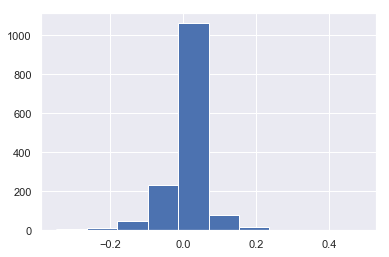

In [65]:
resr = y_train - r.predict(poly3.fit_transform(X_train))
plt.hist(resr)

(array([  2.,   1.,   1.,   2.,  15.,  81., 298.,  75.,   9.,   3.]),
 array([-3.13421847, -2.65010836, -2.16599824, -1.68188812, -1.197778  ,
        -0.71366789, -0.22955777,  0.25455235,  0.73866247,  1.22277258,
         1.7068827 ]),
 <a list of 10 Patch objects>)

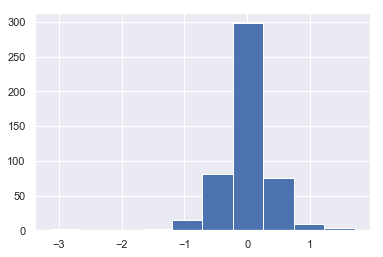

In [66]:
resr = y_val - r.predict(poly3.fit_transform(X_val))
plt.hist(resr)

In [42]:
l = LassoCV()
l.fit(poly3.fit_transform(X_train),y_train)
l.score(poly3.fit_transform(X_train),y_train)

/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_desc

0.1896617914852392

In [43]:
l.score(poly3.fit_transform(X_val), y_val)

0.08223031208233589

(array([  8.,  12.,  60., 251., 412., 337., 215., 112.,  48.,   3.]),
 array([-0.61622708, -0.49575076, -0.37527443, -0.2547981 , -0.13432177,
        -0.01384544,  0.10663088,  0.22710721,  0.34758354,  0.46805987,
         0.5885362 ]),
 <a list of 10 Patch objects>)

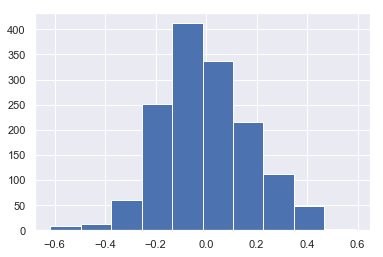

In [67]:
resl = y_train - l.predict(poly3.fit_transform(X_train))
plt.hist(resl)

(array([  6.,   5.,  15.,  70., 113., 125.,  73.,  46.,  25.,   9.]),
 array([-0.61071928, -0.49696823, -0.38321718, -0.26946614, -0.15571509,
        -0.04196405,  0.071787  ,  0.18553804,  0.29928909,  0.41304013,
         0.52679118]),
 <a list of 10 Patch objects>)

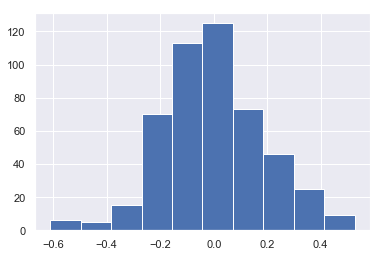

In [68]:
resl = y_val - l.predict(poly3.fit_transform(X_val))
plt.hist(resl)

In [44]:
X_train = pd.concat([pd.DataFrame(X_train), pd.DataFrame(X_val)], axis=0)
y_train = pd.concat([pd.DataFrame(y_train), pd.DataFrame(y_val)], axis=0)
X_train.shape

(1945, 65)

In [45]:
r.score(poly3.fit_transform(X_train),y_train)

-0.28948666128816214

In [46]:
l.score(poly3.fit_transform(X_train),y_train)

0.16327983647081268